In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

You can find many different shapefiles for Chicago on Chicago's data portal. I downloaded (via "export") the 2010 census tract regions from [this page](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik).

In [4]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - Census Tracts - 2010.zip')
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH)

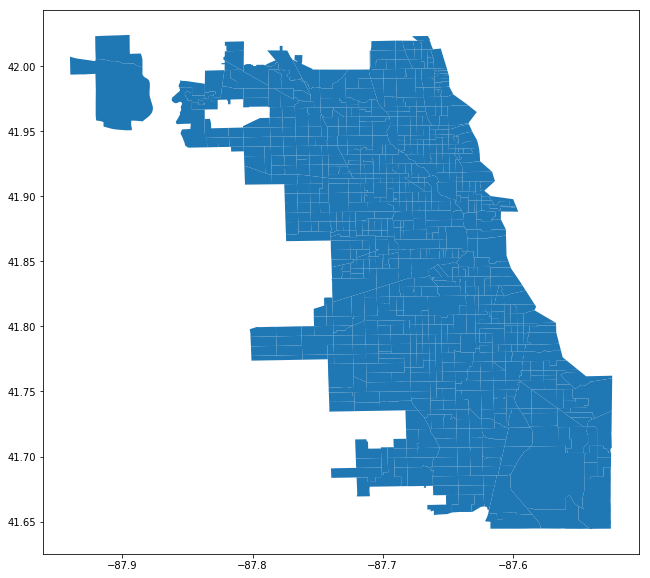

In [6]:
chicago_census_tracts.plot(figsize=(15,10))

In [7]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001182 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


Let's look at just one of these census tracts, just to explore the operations we can do with Geopandas and Shapely.

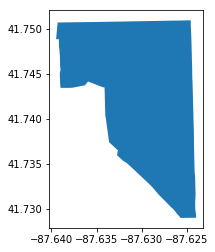

In [8]:
tmp = chicago_census_tracts[chicago_census_tracts['name10'] == '8424']
tmp.plot()

In the plot above, the x axis shows longitude values and the y axis shows latitude values. I'll make two points, one inside the above region, and one outside that region.

In [9]:
tmp_pt1 = Point(-87.63, 41.74)
tmp_pt2 = Point(-87.63, 41.73)

In [11]:
# Point 1 is in the region, so this should return True
tmp.contains(tmp_pt1)

0    True
dtype: bool

In [12]:
# Point 2 is outside the region, so this should return False
tmp.contains(tmp_pt2)

0    False
dtype: bool

In [13]:
CSV_PATH = os.path.join('data', 'hacknight_ticket_sample_data_2015.csv')
df = pd.read_csv(CSV_PATH,low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [14]:
CSV_PATH = os.path.join('data', 'hacknight_sample_data_geocode.csv')
addrs_df = pd.read_csv(CSV_PATH)
addrs_df['address'] = addrs_df['address'] + ', chicago, il'

In [15]:
geocoded_df = pd.merge(left=df, right=addrs_df, how='inner', on='address')
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986


In [30]:
point_maker = lambda x: Point(x['lng'], x['lng'])

In [36]:
geocoded_df.iloc[90:110].apply(point_maker, axis=1)

90     POINT (-87.63198586874586 -87.63198586874586)
91     POINT (-87.63198586874586 -87.63198586874586)
92     POINT (-87.63198586874586 -87.63198586874586)
93     POINT (-87.63198586874586 -87.63198586874586)
94     POINT (-87.63198586874586 -87.63198586874586)
95     POINT (-87.63198586874586 -87.63198586874586)
96     POINT (-87.63198586874586 -87.63198586874586)
97     POINT (-87.63198586874586 -87.63198586874586)
98       POINT (-87.7554106162966 -87.7554106162966)
99       POINT (-87.7554106162966 -87.7554106162966)
100      POINT (-87.7554106162966 -87.7554106162966)
101      POINT (-87.7554106162966 -87.7554106162966)
102      POINT (-87.7554106162966 -87.7554106162966)
103      POINT (-87.7554106162966 -87.7554106162966)
104    POINT (-87.66162070827761 -87.66162070827761)
105    POINT (-87.66162070827761 -87.66162070827761)
106    POINT (-87.66162070827761 -87.66162070827761)
107    POINT (-87.66162070827761 -87.66162070827761)
108    POINT (-87.66162070827761 -87.661620708

In [25]:
geocoded_df['geometry'] = geocoded_df.apply(point_maker, axis=1)

In [37]:
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 -87.63198586874586)
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 -87.63198586874586)
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 -87.63198586874586)
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 -87.63198586874586)
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 -87.63198586874586)


In [40]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001182 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


In [52]:
tract_names = chicago_census_tracts['name10'].unique().tolist()

In [ ]:
def get_census_tract(row, geo_df, tract_id='name10'):
    tract_names = geo_df[tract_id].unique().tolist()
    for tract_name in tract_names:
        if .contains(row['geometry'])

In [71]:
subset_df = geocoded_df.iloc[0:1]
# for tract_name in tract_names:
#     if chicago_census_tracts[chicago_census_tracts['name10'] == tract_name]subset_df['geometry']

In [73]:
chicago_census_tracts.loc[(chicago_census_tracts['name10'] == '8412'), 'geometry'].contains(subset_df[['geometry']])

AttributeError: 'DataFrame' object has no attribute '_geom'

In [72]:
subset_df[['geometry']]

,geometry
0,POINT (-87.63198586874586 -87.63198586874586)
